In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('/content/drive/MyDrive/train_kaggle.csv/train_kaggle.csv')
df

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


#Data Pre-Processing

In [ ]:
df.duplicated().sum()

0

In [3]:
df.isna().sum()

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [4]:
null_percentage=(df.isna().sum()/df.size)*100
null_percentage

Customer_ID         0.000043
outlet_city         0.000043
luxury_sales        0.000754
fresh_sales         0.000883
dry_sales           0.000646
cluster_catgeory    0.000022
dtype: float64

Since there's a very small percentage of missing values, let's remove all the null values from the data set.

In [37]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isna().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

Now all the missing values are removed from the data set.

In [ ]:
df.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales         object
fresh_sales          object
dry_sales            object
cluster_catgeory     object
dtype: object

In [ ]:
df['cluster_catgeory'].value_counts()

cluster_catgeory
1        188950
6        169197
2        155045
4        131027
3         48889
4         41400
5         39516
5             9
1             9
6             8
2             4
3             1
6\            1
95            1
98            1
99            1
100.0         1
89.0          1
Name: count, dtype: int64

The description said there're only 6 clusters, so remove the irrleavant items from the data set.

In [38]:
# Convert 'cluster_catgeory' to numeric, setting non-convertible values to NaN
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

In [39]:
df.dropna(axis=0,inplace=True)

In [40]:
values_to_drop = [89.0, 100.0,99,95,98]
df = df[~df['cluster_catgeory'].isin(values_to_drop)]

In [41]:
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

In [ ]:
df.describe(include=object)

,outlet_city,luxury_sales,fresh_sales,dry_sales
count,774056,774056,774056,774056.00
unique,20,143893,257023,270124.00
top,Colombo,1029.6,6013.92,9168.72
freq,41023,62,28,23.00


Found these texts exist on the luxury_sales, fresh_sales, dry_sales columns, So first convert the values of those texts into numeric.

In [42]:
df['luxury_sales'] = df['luxury_sales'].replace({'One thousand four hundread ruppes': 1400, 'Eight hundread ruppess': 800,
                                                 'six hundread and hirty ': 630, 'Thousand tow hundread ': 1200,
                                                 'seven hundread and nine ruppees': 709, 'Three thousand two hundread ruppess': 3200,
                                                 'Four thousand one hundread ruppess': 4100})
df['fresh_sales'] = df['fresh_sales'].replace({'Six hundread and five ruppes': 605, 'Three thousana and five hundread': 3500,
                                               'thirteen thousand ruppes': 3000, 'Five thousand ruppes': 5000,
                                               'Two thousand seven hundread ruppess': 2700})
df['dry_sales'] = df['dry_sales'].replace({'Four thousand and two hundread ruppes': 4200})

In [18]:
# Extract rows where conversion to float fails
invalid_rows = df[pd.to_numeric(df['dry_sales'], errors='coerce').isna()]
print(invalid_rows)

        Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
174631   10273730.0    Homagama      1074.36     5141.58       nul   
174720   10039004.0    Kaduwela       944.44      4722.2       nul   
175278   10347733.0  Peliyagoda          nul     4286.28       nul   
268571   10047014.0    Panadura       1808.3         nul       nul   
296621   10215937.0    Panadura          nul     8155.11       nul   
327495   10099173.0     Wattala      1303.92         nul       nul   
327505   10312003.0    Kaduwela      1303.06         nul       nul   

        cluster_catgeory  
174631                 2  
174720                 2  
175278                 2  
268571                 2  
296621                 2  
327495                 2  
327505                 2  


Here value nul means that customer has not spent money on buying that specific product type. So replace null from value 0.

In [43]:
columns_to_replace = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[columns_to_replace] = df[columns_to_replace].replace('nul', 0)

In [44]:
df['luxury_sales'] = df['luxury_sales'].astype(float)
df['fresh_sales'] = df['fresh_sales'].astype(float)
df['dry_sales'] = df['dry_sales'].astype(float)

In [45]:
df.drop(columns=['Customer_ID'],inplace=True)

#EDA

Distribution of Target Label

Text(0.5, 1.0, 'Distribution of Clusters')

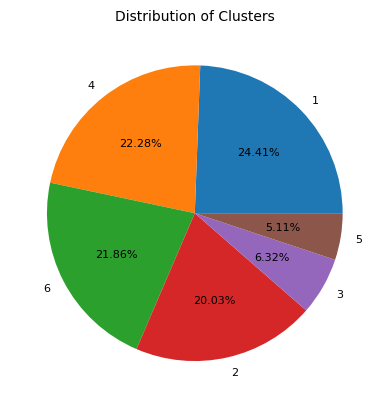

In [16]:
def auto_fmt(pct_value):
    return '{:.2f}%'.format(pct_value)

df_transported_count = df['cluster_catgeory'].value_counts().rename_axis('cluster_catgeory').reset_index(name='Counts')

fig = plt.gcf()
plt.pie(x=df_transported_count['Counts'], labels=df_transported_count['cluster_catgeory'], autopct=auto_fmt, textprops={'fontsize': 8})
plt.title('Distribution of Clusters', fontsize=10)

let's explore the distributions of the luxury_sales, fresh_sales, dry_sales features using histograms and box plots. This will help us understand the spread, central tendency, and potential presence of outliers within these features.

We'll visualize:

1. Histograms to see the distribution.

2. Box plots to identify outliers and the interquartile range.

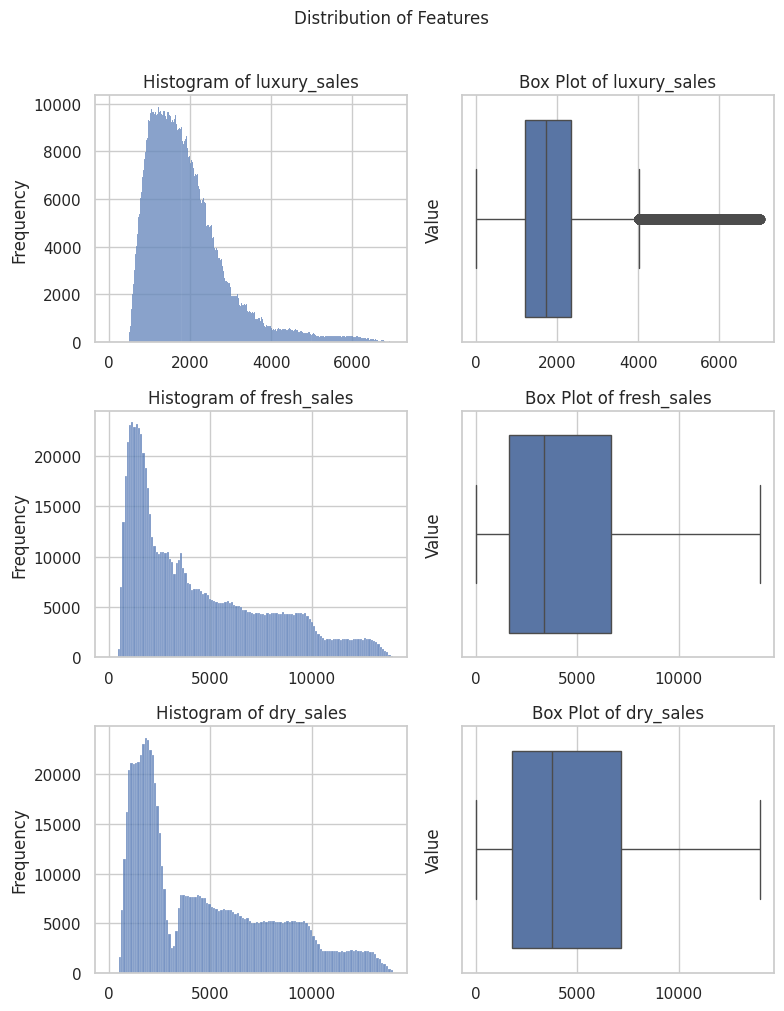

In [27]:
features_to_plot = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Create histograms and box plots for the first the above features
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
fig.suptitle('Distribution of Features', fontsize=12, y=1.01)

for i, feature in enumerate(features_to_plot):
    # Histogram
    sns.histplot(df[feature], kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')
    # Box plot
    sns.boxplot(x=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {feature}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

##Handle Outliers

###Remove outliers from luxury_sales column

By visualizing box plots, it shows the outliers present in luxury_sales.

Removing outliers, using IQR method

In [46]:
s_25 = np.quantile(df['luxury_sales'],0.25)
s_75 = np.quantile(df['luxury_sales'],0.75)
iqr = s_75 - s_25
s_lower = max(s_25 - 1.5*iqr, df['luxury_sales'].min())
s_upper = s_75 + 1.5 * iqr
df = df[(df['luxury_sales'] >= s_lower) & (df['luxury_sales'] <= s_upper)]

After handling outliers,

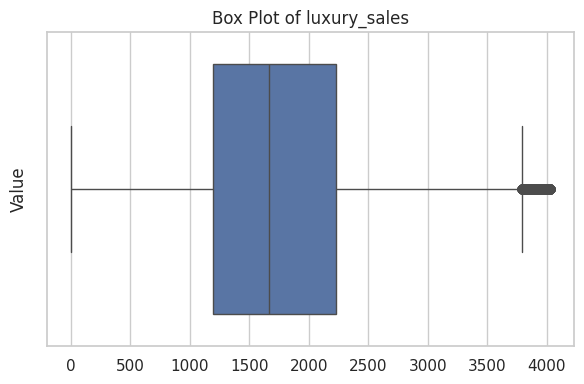

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['luxury_sales'])
plt.title('Box Plot of luxury_sales')
plt.xlabel('')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

###Remove outliers from outlet_city column

In [ ]:
df.outlet_city.unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

Let's visualize how many customers are from each clustor category from each city.

In [47]:
city_counts = df['outlet_city'].value_counts()

# Initialize dictionary to store counts
city_data = {city: np.zeros(6) for city in city_counts.index}

# Iterate through each city and count occurrences of each cluster category
for city in city_counts.index:
    counts = df[df['outlet_city'] == city]['cluster_catgeory'].value_counts().sort_index()
    city_data[city] = counts

# Create DataFrame from dictionary
new_df = pd.DataFrame.from_dict(city_data, orient='index').fillna(0)

# Rename index and columns for clarity
new_df.index.name = 'City'
new_df.columns = [f'Cluster {i}' for i in range(1, 7)]

new_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
City,,,,,,
Colombo,19018.0,2454.0,3.0,1.0,17044.0,0.0
Galle,19033.0,2435.0,0.0,2.0,17036.0,1.0
Batticaloa,18958.0,2383.0,0.0,2.0,17146.0,2.0
Kalmunai,18851.0,2359.0,0.0,1.0,17022.0,3.0
Jaffna,18820.0,2445.0,3.0,2.0,16939.0,2.0
Negombo,18847.0,2479.0,0.0,2.0,16880.0,2.0
Katunayake,19078.0,2322.0,0.0,2.0,16745.0,0.0
Kandy,18895.0,2383.0,2.0,0.0,16789.0,0.0
Trincomalee,18685.0,2406.0,1.0,3.0,16927.0,0.0


This data frame shows the presence of several cluster categories with number of customers less than 5. They are the fewer outliers present in outlet_city column. So I removed them from the dataset.

In [48]:
for city in city_counts.index:
    # Filter DataFrame for current city
    d = df[df['outlet_city'] == city]

    # Group by cluster_category and transform to count occurrences
    counts = d.groupby('cluster_catgeory').transform('count')

    # Assign NaN to cluster_category where count is less than 5
    df.loc[df['outlet_city'] == city, 'cluster_catgeory'] = df.loc[df['outlet_city'] == city, 'cluster_catgeory'].where(counts['outlet_city'] >= 5, np.nan)

df

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,Kelaniya,1209.60,756.00,5292.00,4.0
1,Moratuwa,1590.12,1060.08,6007.12,NaN
2,Wattala,2288.88,1481.04,9155.52,4.0
3,Wattala,2274.94,1739.66,9099.76,4.0
4,Kelaniya,2345.49,2069.55,9243.99,4.0
...,...,...,...,...,...
774144,Galle,2695.45,2782.40,2608.50,3.0
774145,Colombo,1644.80,1593.40,1747.60,3.0
774146,Colombo,3796.80,3678.15,3915.45,3.0
774149,Katunayake,2389.76,2240.40,2613.80,3.0


Those identified customer's cluster_category is updated with NaN, Now we're gonna remove them from the data set.

In [49]:
df.dropna(inplace=True, axis=0)

Let's check again the number of customers from each cluster category from each city.

In [50]:
city_counts = df['outlet_city'].value_counts()

# Initialize dictionary to store counts
city_data = {city: np.zeros(6) for city in city_counts.index}

# Iterate through each city and count occurrences of each cluster category
for city in city_counts.index:
    counts = df[df['outlet_city'] == city]['cluster_catgeory'].value_counts().sort_index()
    city_data[city] = counts

# Create DataFrame from dictionary
new_df = pd.DataFrame.from_dict(city_data, orient='index').fillna(0)

# Rename index and columns for clarity
new_df.index.name = 'City'
new_df.columns = [f'Cluster {i}' for i in range(1, 7)]

new_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
City,,,,,,
Colombo,19018.0,2454.0,17044.0,0.0,0.0,0.0
Galle,19033.0,2435.0,17036.0,0.0,0.0,0.0
Batticaloa,18958.0,2383.0,17146.0,0.0,0.0,0.0
Kalmunai,18851.0,2359.0,17022.0,0.0,0.0,0.0
Negombo,18847.0,2479.0,16880.0,0.0,0.0,0.0
Jaffna,18820.0,2445.0,16939.0,0.0,0.0,0.0
Katunayake,19078.0,2322.0,16745.0,0.0,0.0,0.0
Kandy,18895.0,2383.0,16789.0,0.0,0.0,0.0
Trincomalee,18685.0,2406.0,16927.0,0.0,0.0,0.0


Useful insight- customers clustered under 1, 2, 3 are from these cities: Colombo, Galle, Batticaloa, Kalmunai, Jaffna, Negambo, Katunayake, Kandy, Trincomalee and Gampaha.
customers clustered under 4, 5, 6 are from these cities: Nuwara Eliya, Dehiwala, Kaduwela, Kotte, Panadura, Wattala, Homagama, Moratuwa, Kelaniya and Peliyagoda.

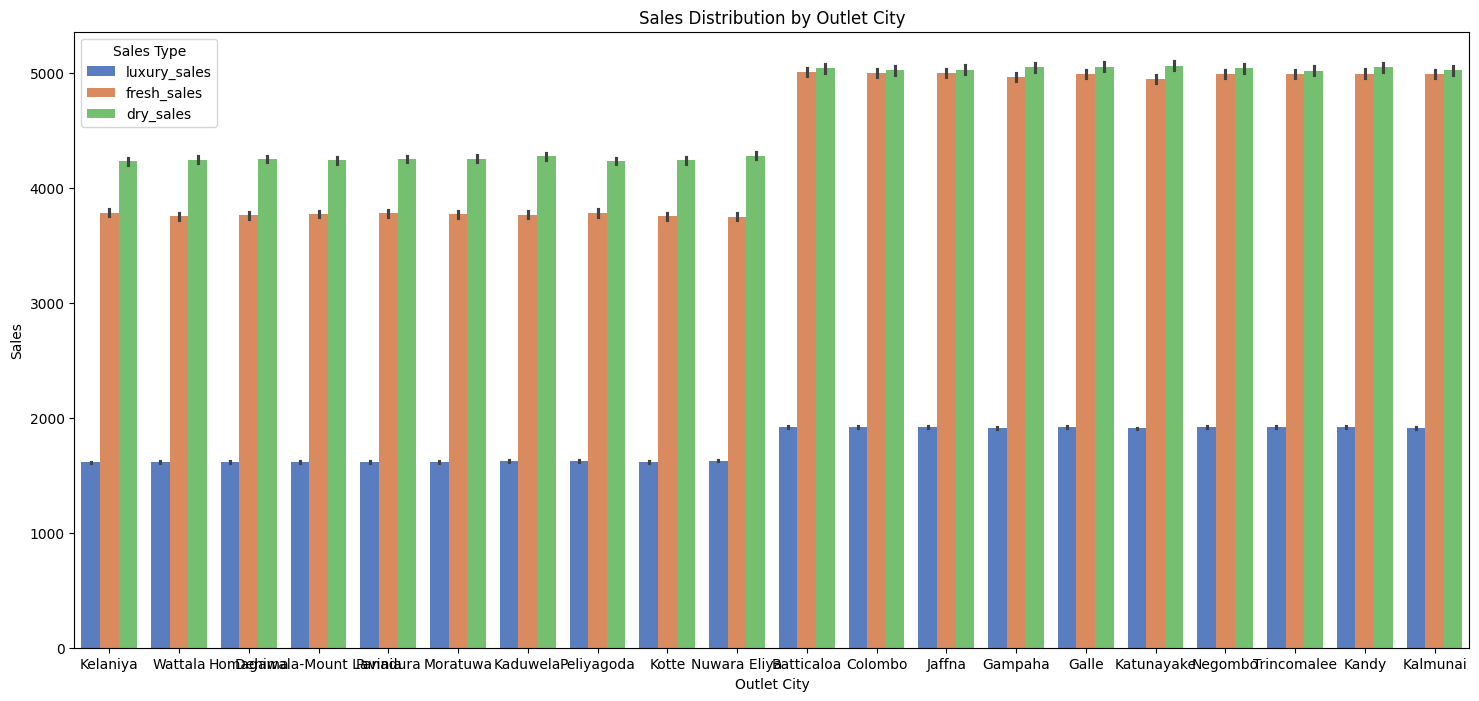

In [ ]:
# Melt the dataframe to reshape it for plotting
df_melted = pd.melt(df, id_vars=['outlet_city'], value_vars=['luxury_sales', 'fresh_sales', 'dry_sales'],
                    var_name='sales_type', value_name='sales')

plt.figure(figsize=(18, 8))
sns.barplot(x='outlet_city', y='sales', hue='sales_type', data=df_melted, palette='muted')

plt.title('Sales Distribution by Outlet City')
plt.xlabel('Outlet City')
plt.ylabel('Sales')
plt.grid(False)
plt.legend(title='Sales Type')
plt.show()

#Feature Engineering

Let's create a new featue which represents the total spending on all 3 items.

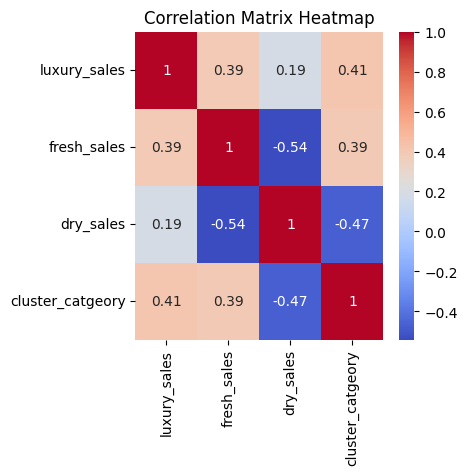

In [51]:
df1=df[['luxury_sales','fresh_sales','dry_sales','cluster_catgeory']]
corr_matrix = df1.corr()

plt.figure(figsize=(4, 4))  # Adjust size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
df1=df.copy()
y = df1['cluster_catgeory']
X = df1.drop(columns=['cluster_catgeory'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

credits: https://www.kaggle.com/code/akinduhiman/cluster-category-prediction-datastorm-5-0


Let's build a RandomForest model to predict customer cluster categories using sales data and city information.

##Convert data to TensorFlow datasets

We convert the Pandas dataframes into TensorFlow datasets, which are required for training the TensorFlow Decision Forests model.

In [58]:
!pip install tensorflow_decision_forests

  Using cached tensorflow_decision_forests-1.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [54]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
label='cluster_catgeory'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), label=label, task=tfdf.keras.Task.CLASSIFICATION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), label=label, task=tfdf.keras.Task.CLASSIFICATION)

##Build and compile the Random Forest model


We use TensorFlow Decision Forests to build a Random Forest model for classification. The model is compiled with accuracy as the evaluation metric.

In [56]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
model.compile(metrics=["accuracy"])

Use /tmp/tmpdmkunoql as temporary training directory


In [57]:
model.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:02.022509. Found 591144 examples.
Training model...
Model trained in 0:04:02.855704
Compiling model...
Model compiled.


##Visualize the model


To understand the decision-making process of the Random Forest, we visualize one of the trees in the forest.

In [58]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

##Evaluate the model


We evaluate the model's performance on the test dataset.

In [59]:
evaluation = model.evaluate(test_ds, return_dict=True)

148/148 [==============================] - 6s 39ms/step - loss: 0.0000e+00 - accuracy: 0.9999


##Make predictions

The model is used to make predictions on the test dataset.

In [60]:
y_pred = model.predict(test_ds)

148/148 [==============================] - 10s 65ms/step


In [61]:
y_pred_rounded = tf.cast(tf.round(y_pred), tf.int32)

In [62]:
y_pred = tf.argmax(y_pred_rounded, axis=1)

In [63]:
y_pred

<tf.Tensor: shape=(147786,), dtype=int64, numpy=array([1, 4, 6, ..., 2, 4, 2])>

##Calculate and display accuracy


We calculate the accuracy of the model's predictions on the test dataset and display it.

In [64]:
from sklearn.metrics import accuracy_score
print('*'*20)
print('Accuracy  :',np.round(accuracy_score(y_test, y_pred)*100,2),'%')
print('*'*20)

********************
Accuracy  : 99.99 %
********************


In [65]:
# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('*'*40)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print('*'*40)

****************************************
Mean Squared Error: 0.0007172533257548076
Mean Absolute Error: 0.00018946314265221332
R-squared: 0.9998012324957259
****************************************
